## Hyphothesis 6a (CAPM method): 
### The Alternative Portfolio will outperform Control Portfolio 1 and Control Portfolio 2 in 2019 for the selected thresholds: R=0.0, 0.05, 0.1, 0.15, 0.2

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from random import shuffle
import random
import seaborn as sns
import scipy
from scipy.stats import levene
from scipy.stats import ttest_ind
import scipy.stats as stats
from time import time




os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

In [6]:
%matplotlib notebook
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Import Data

In [7]:
df_price = pd.read_csv('data\\processed\\df_price07_20.csv')
df_return = pd.read_csv('data\\processed\\df_return7_20.csv')

df_price.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df_return.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

df_price.index = pd.to_datetime(df_price['date'])
df_return.index = pd.to_datetime(df_return['date'])

df_price = df_price.drop('date', axis=1)
df_return = df_return.drop('date', axis=1)


dfsp = df_price['SPX']

df_price = df_price.drop('SPX', axis=1)
df_return = df_return.drop('SPX', axis=1)

#### RETURNS: 8/2008-12/2008: S&P

In [8]:
return_sp08 = ((dfsp[dfsp.index=='2008-12-31'].values-dfsp[dfsp.index=='2008-09-02'].values)/dfsp[dfsp.index=='2008-09-02'].values)[0]
return_sp08

-0.29299926423394224

#### RETURNS: 2019: S&P

In [9]:
return_sp19 = ((dfsp[dfsp.index=='2019-12-31'].values-dfsp[dfsp.index=='2018-12-31'].values)/dfsp[dfsp.index=='2018-12-31'].values)[0]
return_sp19

0.28878068935992623

### Compnay Symbols

In [10]:
companies = df_price.columns

### RETURNS: 8/2008-12/2008: PER COMPANY

In [11]:
worst_days_returns08 = {}
for symbol in companies:
    temp_end = df_price.loc['2008-12-31', symbol].values
    temp_start = df_price.loc['2008-08-29', symbol].values
    temp_ret = ((temp_end-temp_start)/temp_start)[0]
    worst_days_returns08[symbol] = temp_ret
worst_days_returns08['ORCL']

-0.19151846785225715

### Generate Dates for Monthly Returns

In [12]:
start_dates = pd.to_datetime([ 
# '12/29/2006',
# '01/31/2007','02/28/2007','03/30/2007','04/30/2007','05/31/2007','06/29/2007','07/31/2007','08/31/2007','09/28/2007','10/31/2007','11/30/2007','12/31/2007',
# '01/31/2008','02/29/2008','03/31/2008','04/30/2008','05/30/2008','06/30/2008','07/31/2008','08/29/2008','09/30/2008','10/31/2008','11/28/2008',
'12/31/2008',
'01/30/2009','02/27/2009','03/31/2009','04/30/2009','05/29/2009','06/30/2009','07/31/2009','08/31/2009','09/30/2009','10/30/2009','11/30/2009','12/31/2009',
'01/29/2010','02/26/2010','03/31/2010','04/30/2010','05/28/2010','06/30/2010','07/30/2010','08/31/2010','09/30/2010','10/29/2010','11/30/2010','12/31/2010',
'01/31/2011','02/28/2011','03/31/2011','04/29/2011','05/31/2011','06/30/2011','07/29/2011','08/31/2011','09/30/2011','10/31/2011','11/30/2011','12/30/2011',
'01/31/2012','02/29/2012','03/30/2012','04/30/2012','05/31/2012','06/29/2012','07/31/2012','08/31/2012','09/28/2012','10/31/2012','11/30/2012','12/31/2012',
'01/31/2013','02/28/2013','03/28/2013','04/30/2013','05/31/2013','06/28/2013','07/31/2013','08/30/2013','09/30/2013','10/31/2013','11/29/2013','12/31/2013',
'01/31/2014','02/28/2014','03/31/2014','04/30/2014','05/30/2014','06/30/2014','07/31/2014','08/29/2014','09/30/2014','10/31/2014','11/28/2014','12/31/2014',
'01/30/2015','02/27/2015','03/31/2015','04/30/2015','05/29/2015','06/30/2015','07/31/2015','08/31/2015','09/30/2015','10/30/2015','11/30/2015','12/31/2015',
'01/29/2016','02/29/2016','03/31/2016','04/29/2016','05/31/2016','06/30/2016','07/29/2016','08/31/2016','09/30/2016','10/31/2016','11/30/2016','12/30/2016',
'01/31/2017','02/28/2017','03/31/2017','04/28/2017','05/31/2017','06/30/2017','07/31/2017','08/31/2017','09/29/2017','10/31/2017','11/30/2017','12/29/2017',
'01/31/2018','02/28/2018','03/29/2018','04/30/2018','05/31/2018','06/29/2018','07/31/2018','08/31/2018','09/28/2018','10/31/2018','11/30/2018','12/31/2018',
'01/31/2019','02/28/2019','03/29/2019','04/30/2019','05/31/2019','06/28/2019','07/31/2019','08/30/2019','09/30/2019','10/31/2019','11/29/2019'
])

end_dates = pd.to_datetime([ 
# '01/31/2007','02/28/2007','03/30/2007','04/30/2007','05/31/2007','06/29/2007','07/31/2007','08/31/2007','09/28/2007','10/31/2007','11/30/2007','12/31/2007',
# '01/31/2008','02/29/2008','03/31/2008','04/30/2008','05/30/2008','06/30/2008','07/31/2008','08/29/2008','09/30/2008','10/31/2008','11/28/2008','12/31/2008',
'01/30/2009','02/27/2009','03/31/2009','04/30/2009','05/29/2009','06/30/2009','07/31/2009','08/31/2009','09/30/2009','10/30/2009','11/30/2009','12/31/2009',
'01/29/2010','02/26/2010','03/31/2010','04/30/2010','05/28/2010','06/30/2010','07/30/2010','08/31/2010','09/30/2010','10/29/2010','11/30/2010','12/31/2010',
'01/31/2011','02/28/2011','03/31/2011','04/29/2011','05/31/2011','06/30/2011','07/29/2011','08/31/2011','09/30/2011','10/31/2011','11/30/2011','12/30/2011',
'01/31/2012','02/29/2012','03/30/2012','04/30/2012','05/31/2012','06/29/2012','07/31/2012','08/31/2012','09/28/2012','10/31/2012','11/30/2012','12/31/2012',
'01/31/2013','02/28/2013','03/28/2013','04/30/2013','05/31/2013','06/28/2013','07/31/2013','08/30/2013','09/30/2013','10/31/2013','11/29/2013','12/31/2013',
'01/31/2014','02/28/2014','03/31/2014','04/30/2014','05/30/2014','06/30/2014','07/31/2014','08/29/2014','09/30/2014','10/31/2014','11/28/2014','12/31/2014',
'01/30/2015','02/27/2015','03/31/2015','04/30/2015','05/29/2015','06/30/2015','07/31/2015','08/31/2015','09/30/2015','10/30/2015','11/30/2015','12/31/2015',
'01/29/2016','02/29/2016','03/31/2016','04/29/2016','05/31/2016','06/30/2016','07/29/2016','08/31/2016','09/30/2016','10/31/2016','11/30/2016','12/30/2016',
'01/31/2017','02/28/2017','03/31/2017','04/28/2017','05/31/2017','06/30/2017','07/31/2017','08/31/2017','09/29/2017','10/31/2017','11/30/2017','12/29/2017',
'01/31/2018','02/28/2018','03/29/2018','04/30/2018','05/31/2018','06/29/2018','07/31/2018','08/31/2018','09/28/2018','10/31/2018','11/30/2018','12/31/2018',
'01/31/2019','02/28/2019','03/29/2019','04/30/2019','05/31/2019','06/28/2019','07/31/2019','08/30/2019','09/30/2019','10/31/2019','11/29/2019','12/31/2019'
])

# function to validate lists above

def list_diff(list1, list2):
    out = [item for item in list1 if not item in list2]
    return out

# validate start dates list

print('Missing Start Dates: {}'.format(list_diff(start_dates, list(df_price.index))))

# validate end dates list

print('Missing End Dates: {}'.format(list_diff(end_dates, list(df_price.index))))

Missing Start Dates: []
Missing End Dates: []


### Generate Risk Free Rates 2009-2019

In [13]:
rfr09 = (1+0.0015)**(1/3) - 1
rfr10 = (1+0.0013)**(1/3) - 1
rfr11 = (1+0.0005)**(1/3) - 1
rfr12 = (1+0.0011)**(1/3) - 1
rfr13 = (1+0.00075)**(1/3) - 1
rfr14 = (1+0.0004)**(1/3) - 1
rfr15 = (1+0.0004)**(1/3) - 1
rfr16 = (1+0.0035)**(1/3) - 1
rfr17 = (1+0.0099)**(1/3) - 1
rfr18 = (1+0.0185)**(1/3) - 1
rfr19 = (1+0.0211)**(1/3) - 1

In [14]:
rfr09 = pd.Series(np.repeat(rfr09,12))
rfr10 = pd.Series(np.repeat(rfr10,12))
rfr11 = pd.Series(np.repeat(rfr11,12))
rfr12 = pd.Series(np.repeat(rfr12,12))
rfr13 = pd.Series(np.repeat(rfr13,12))
rfr14 = pd.Series(np.repeat(rfr14,12))
rfr15 = pd.Series(np.repeat(rfr15,12))
rfr16 = pd.Series(np.repeat(rfr16,12))
rfr17 = pd.Series(np.repeat(rfr17,12))
rfr18 = pd.Series(np.repeat(rfr18,12))
rfr19 = pd.Series(np.repeat(rfr19,12))

In [15]:
risk_free_rates = pd.concat([rfr09, rfr10, rfr11, rfr12, rfr13, rfr14, rfr15, rfr16, rfr17, rfr18, rfr19])
risk_free_rates = np.matrix(pd.concat([risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates], axis=1))
# risk_free_rates.columns = alt_ret19.columns
# risk_free_rates.index = alt_ret19.index

### Run Experiment

## $$For\thinspace each\thinspace  r\thinspace  in\thinspace  the\thinspace  R\thinspace  Threshold\thinspace$$<br> $$H^{1}_{0}: \mu_{a} = \mu_{ctl1} \hspace{1cm} H^{1}_{a}: \mu_{a} > \mu_{ctl1}$$<br><br>$$H^{2}_{0}: \mu_{a} = \mu_{ctl2} \hspace{1cm} H^{1}_{a}: \mu_{a} > \mu_{ctl2}$$

In [50]:
r_thresholds = [0, 0.05, 0.1, 0.15, 0.20] ## threshold value compared to market
portfolio_size = [25] ## number of stocks in each portfolio
n_samples = [10]


experiment_df = pd.DataFrame([])

t0 = time()
for value in r_thresholds:
    """generate/sample symbols"""
    for size in portfolio_size:
        for sample_size in n_samples:
            n_bootstraps = sample_size
            for i in range(n_bootstraps):
                comparison_dic = {}
                
                alt_list = []
                control_list1 = []

                for symbol in companies:
                    temp_series = worst_days_returns08[symbol]
                    if temp_series-return_sp08>value:
                        alt_list.append(symbol)
                    else:
                        control_list1.append(symbol)
                                     
                alt_symbols = random.sample(alt_list, size)
                ctl1_symbols = random.sample(control_list1, size)
                ctl2_symbols = random.sample(list(companies), size)

                
                ### Add the symbols to the dictionary
                comparison_dic['alt_symbols'] = [alt_symbols]
                comparison_dic['control_symbols1'] = [ctl1_symbols]
                comparison_dic['control_symbols2'] = [ctl2_symbols]                
                
                
                ######--------------------------------#########
                """ALT PORTOLIO"""
                ###########-------------------------------##############

                ### End Dates
                alt_end19 = df_price.loc[end_dates, alt_symbols]

                ### Start Dates
                alt_start19 = df_price.loc[start_dates, alt_symbols]
                alt_start19.index = alt_end19.index

                ### Generate Montly Returns
                alt_ret19 = (alt_end19-alt_start19)/alt_start19


                alt_ret19  = alt_ret19 - risk_free_rates
                alt_ret18 = alt_ret19[alt_ret19.index<'2019-01-01']


                #alt_mean_ret19 = alt_ret19.mean(axis=0)
                alt_mean_ret18 = alt_ret18.mean(axis=0)

                #alt_var_ret19 = alt_ret19.var(axis=0)
                alt_var_ret18 = alt_ret18.var(axis=0)


                alt_cov18 = alt_ret18.cov()
                alt_invcov18 = pd.DataFrame(np.linalg.inv(alt_cov18.values), alt_cov18.columns, alt_cov18.index)


                alt_zeta18 = alt_invcov18.dot(alt_mean_ret18)

                alt_zeta18_sum = alt_zeta18.sum()
                alt_weights18 = alt_zeta18/alt_zeta18_sum


                alt_weighted_ret18 = alt_weights18*alt_mean_ret18

                ######--------------------------------#########
                """CONTROL PORTOLIO 1"""
                ###########-------------------------------##############

                ### End Dates
                ctl1_end19 = df_price.loc[end_dates, ctl1_symbols]

                ### Start Dates
                ctl1_start19 = df_price.loc[start_dates, ctl1_symbols]
                ctl1_start19.index = ctl1_end19.index

                ### Generate Montly Returns
                ctl1_ret19 = (ctl1_end19-ctl1_start19)/ctl1_start19
                ctl1_ret19  = ctl1_ret19 - risk_free_rates
                ctl1_ret18 = ctl1_ret19[ctl1_ret19.index<'2019-01-01'] 
                ctl1_mean_ret18 = ctl1_ret18.mean(axis=0)
                ctl1_var_ret18 = ctl1_ret18.var(axis=0)
                ctl1_cov18 = ctl1_ret18.cov()
                ctl1_invcov18 = pd.DataFrame(np.linalg.inv(ctl1_cov18.values), ctl1_cov18.columns, ctl1_cov18.index)

                ctl1_zeta18 = ctl1_invcov18.dot(ctl1_mean_ret18)

                ctl1_weights18 = ctl1_zeta18/ctl1_zeta18.sum()
                ctl1_weighted_ret18 = ctl1_weights18*ctl1_mean_ret18



                ######--------------------------------#########
                """CONTROL PORTOLIO 2"""
                ###########-------------------------------##############

                ### End Dates
                ctl2_end19 = df_price.loc[end_dates, ctl2_symbols]

                ### Start Dates
                ctl2_start19 = df_price.loc[start_dates, ctl2_symbols]
                ctl2_start19.index = ctl2_end19.index

                ### Generate Montly Returns
                ctl2_ret19 = (ctl2_end19-ctl2_start19)/ctl2_start19


                ctl2_ret19  = ctl2_ret19 - risk_free_rates
                ctl2_ret18 = ctl2_ret19[ctl2_ret19.index<'2019-01-01'] 

                ctl2_mean_ret18 = ctl2_ret18.mean(axis=0)

                ctl2_var_ret18 = ctl2_ret18.var(axis=0)


                ctl2_cov18 = ctl2_ret18.cov()

                ctl2_invcov18 = pd.DataFrame(np.linalg.inv(ctl2_cov18.values), ctl2_cov18.columns, ctl2_cov18.index)

                ctl2_zeta18 = ctl2_invcov18.dot(ctl2_mean_ret18)

                ctl2_weights18 = ctl2_zeta18/ctl2_zeta18.sum()
                ctl2_weighted_ret18 = ctl2_weights18*ctl2_mean_ret18

                ##########-----------------------#############
                """CALCULATE WEIGHTS"""
                ##########-----------------------#############

                alt_test19 = ((df_price.loc['2019-12-31', alt_symbols].iloc[0] - df_price.loc['2018-12-31', alt_symbols].iloc[0])/df_price.loc['2018-12-31', alt_symbols].iloc[0])@alt_weighted_ret18


                ctl1_test19 = ((df_price.loc['2019-12-31', ctl1_symbols].iloc[0] - df_price.loc['2018-12-31', ctl1_symbols].iloc[0])/df_price.loc['2018-12-31', ctl1_symbols].iloc[0])@ctl1_weighted_ret18

                ctl2_test19 = ((df_price.loc['2019-12-31', ctl2_symbols].iloc[0] - df_price.loc['2018-12-31', ctl2_symbols].iloc[0])/df_price.loc['2018-12-31', ctl2_symbols].iloc[0])@ctl2_weighted_ret18

                #### Add values to comparison dictionary
                comparison_dic['CTL1_19'] = ctl1_test19,
                comparison_dic['CTL2_19'] = ctl2_test19,
                comparison_dic['ALT_19'] = alt_test19
                
                comparison_dic['r_value'] = value
                comparison_dic['sample_size'] = n_bootstraps
                comparison_dic['portfolio_size'] = size
                ### Add to the dataframe
                temp_df = pd.DataFrame(comparison_dic)
                experiment_df = pd.concat([experiment_df, temp_df])
                
        if sample_size % 500 ==0:
            print('{} complete'.format((value, size)))
            t1 = round((time()-t0)/60, 4)
            print('{} minutes have passed'.format(t1))

        
### CAPTURE THE VARIANCE OF THE RETURNS FOR EACH OF THE SYMBOLS (dont forget to add to dataframe)
        
experiment_df.head()

(0, 25) complete
13.0465 minutes have passed
(0.05, 25) complete
26.2169 minutes have passed
(0.1, 25) complete
38.1686 minutes have passed
(0.15, 25) complete
48.9597 minutes have passed
(0.2, 25) complete
59.946 minutes have passed


,alt_symbols,control_symbols1,control_symbols2,CTL1_19,CTL2_19,ALT_19,r_value,sample_size,portfolio_size
0,"[ALXN, RMD, CL, PGR, MKC, LLY, AMGN, CTL, UTX,...","[VLO, WY, CAT, FISV, WDC, PRU, INCY, BXP, EL, ...","[NEM, SJM, EQIX, REG, TSCO, MCD, ETFC, COST, A...",0.058222,0.009101,0.008273,0.0,10000,25
0,"[VZ, YUM, OXY, EXPD, CHRW, CMG, JBHT, COF, MRK...","[LB, AIV, TSN, ATVI, IDXX, PVH, DOV, AES, BSX,...","[UPS, SYY, VRTX, BEN, HUM, LOW, JPM, PFE, ES, ...",0.009076,0.007074,0.014366,0.0,10000,25
0,"[EMR, PRGO, PHM, UNH, TAP, HD, FIS, MYL, CTAS,...","[VFC, AXP, WYNN, EMN, PH, EA, C, KIM, FFIV, NR...","[MA, LNT, ED, AOS, BIIB, INCY, SJM, HPQ, CHRW,...",0.003857,0.014168,0.008973,0.0,10000,25
0,"[RE, AEE, SRE, FRT, PSA, HRB, HUM, RHI, MMM, G...","[CSCO, CCI, GPS, AES, LRCX, SBUX, IDXX, NOV, T...","[PG, AGN, IBM, BAX, HST, PNC, FDX, LUV, TROW, ...",0.011575,0.007675,0.013225,0.0,10000,25
0,"[RE, BDX, PFE, GILD, UAL, GPC, MYL, VZ, CMCSA,...","[EOG, OKE, ILMN, NOV, AME, PXD, JNPR, EL, PKG,...","[CB, TMO, LNC, UAA, HRB, NVDA, CCL, WM, STX, T...",0.022593,0.010118,0.005645,0.0,10000,25


In [54]:
comparison_df = experiment_df[['CTL1_19', 'CTL2_19', 'ALT_19', 'r_value', 'sample_size', 'portfolio_size']]
comparison_df.head(2)

,CTL1_19,CTL2_19,ALT_19,r_value,sample_size,portfolio_size
0,0.058222,0.009101,0.008273,0.0,10000,25
0,0.009076,0.007074,0.014366,0.0,10000,25


In [59]:
alpha=0.05
z_critical = 1.645
hypothesis_df = pd.DataFrame([])

for r in r_thresholds:
    temp_dic = {}
    temp_df = comparison_df[comparison_df['r_value']==r]
    temp_ctl1 = temp_df['CTL1_19'] 
    temp_ctl2 = temp_df['CTL2_19'] 
    temp_alt = temp_df['ALT_19']

    ### Z - Test
    x_bar_alt = temp_alt.mean()
    x_bar_ctl1 = temp_ctl1.mean()
    x_bar_ctl2 = temp_ctl2.mean()
    std_error1 = np.sqrt(temp_alt.var()+temp_ctl1.var()-2*np.cov(temp_alt, temp_ctl1)[0][1])
    std_error2 = np.sqrt(temp_alt.var()+temp_ctl2.var()-2*np.cov(temp_alt, temp_ctl2)[0][1])    
    z_hat1 = (x_bar_alt-x_bar_ctl1-0)/std_error1
    z_hat2 = (x_bar_alt-x_bar_ctl2-0)/std_error2    
    ## Generate P-values
    p1 = 1-stats.norm.cdf(z_hat1)
    p2 = 1-stats.norm.cdf(z_hat2)
    
    ### Generate Upper/Lower Bounds
    t_lower1 = x_bar_alt-std_error1*z_critical
    t_lower2 = x_bar_alt-std_error2*z_critical    
    t_upper1 = x_bar_alt+std_error1*z_critical
    t_upper2 = x_bar_alt+std_error2*z_critical    

    ### Append Dataframe
    temp_dic['R-Threshold'] = r    
    temp_dic['x_bar_alt'] = x_bar_alt 
    temp_dic['lower1'] = t_lower1
    temp_dic['upper1'] = t_upper1
    temp_dic['P1A'] = p1
    temp_dic['H1A'] = ['Reject' if p1 < alpha else 'Accept']    
    temp_dic['lower2'] = t_lower2
    temp_dic['upper2'] = t_upper2
    temp_dic['P2A'] = p2
    temp_dic['H2A'] = ['Reject' if p2 < alpha else 'Accept']
    
    temp_df = pd.DataFrame(temp_dic)
    hypothesis_df = pd.concat([hypothesis_df, temp_df])

hypothesis_df.to_csv('plots\\h6a\\hypothesis_test_s10000_2.csv') 
hypothesis_df        

,R-Threshold,x_bar_alt,lower1,upper1,P1A,H1A,lower2,upper2,P2A,H2A
0,0.00,0.009481,-0.103684,0.122645,0.528457,Accept,-0.174500,0.193462,0.499418,Accept
0,0.05,0.009430,-0.016041,0.034900,0.589984,Accept,-0.007312,0.026172,0.544456,Accept
0,0.10,0.009347,-0.004477,0.023171,0.618999,Accept,-0.001896,0.020590,0.578523,Accept
0,0.15,0.007944,-0.007286,0.023174,0.661184,Accept,-0.073390,0.089278,0.527241,Accept
0,0.20,0.006055,-0.003770,0.015880,0.815472,Accept,-0.006900,0.019010,0.723094,Accept


<IPython.core.display.Javascript object>


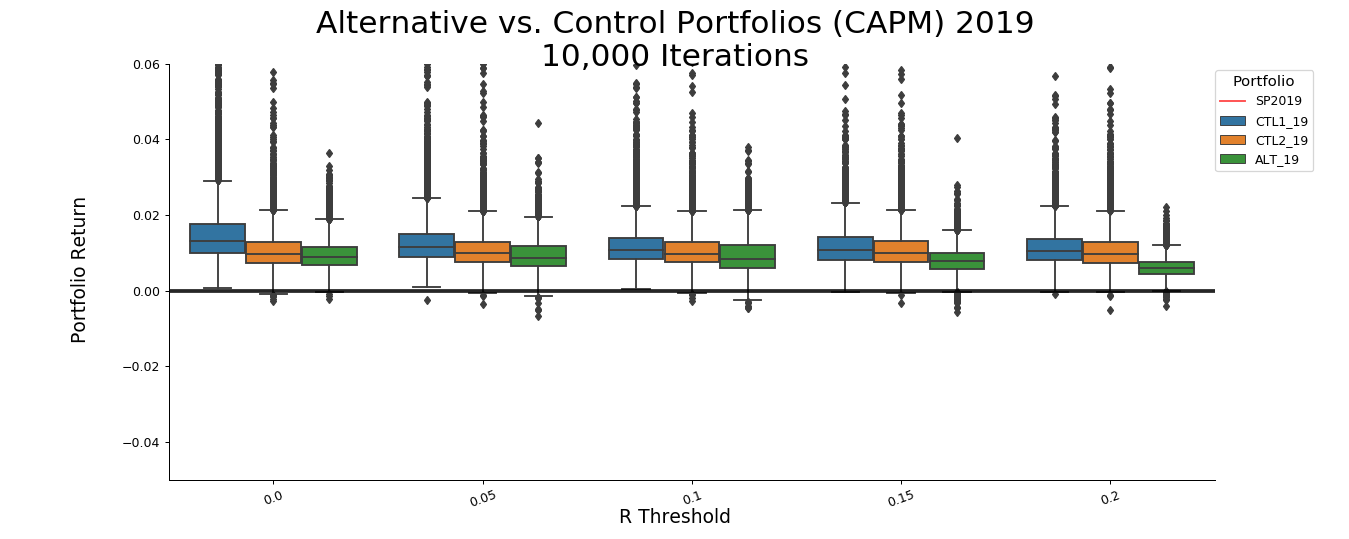

<IPython.core.display.Javascript object>


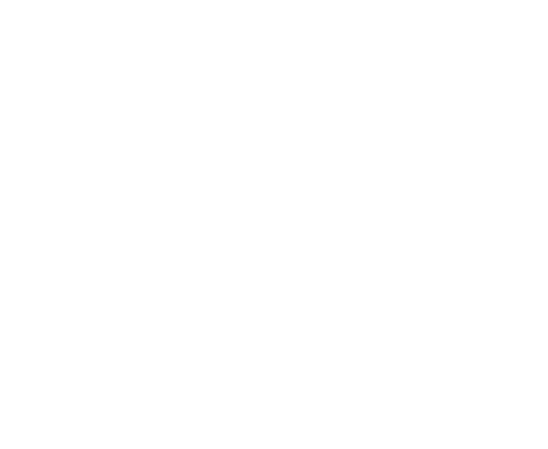

In [61]:
plot_boxplots(comparison_df)

In [60]:
def plot_boxplots(df):
    fig, ax = plt.subplots(figsize=(15,6))

    temp_df = df
    melted_df = pd.melt(temp_df,id_vars=['r_value', 'sample_size', 'portfolio_size'], value_vars=['CTL1_19', 'CTL2_19', 'ALT_19'],
                var_name = 'portfolio', value_name='returns')

    g = sns.catplot(ax=ax, data=melted_df, kind='box', x='r_value', y='returns', hue='portfolio', legend=True, legend_out=True)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('')        

    #ax.set_title('Samples={}, P_Size={}'.format(sample_size, p_size), fontsize=20)
    ax.tick_params(axis="x", rotation=20)
    ax.axhline(return_sp19, color='red', alpha=0.7, label='SP2019')
    ax.axhline(0, color='black', alpha=0.85, linewidth=3)
    ax.set_ylim(-0.05, 0.06)

    legend = ax.legend(loc='upper right', bbox_to_anchor=(1.10,1), title='Portfolio', fontsize=10)
    legend.get_title().set_fontsize('12')

    fig.suptitle('Alternative vs. Control Portfolios (CAPM) 2019\n{:,} Iterations'.format(n_samples[0]), fontsize=25)
    fig.text(0.5, 0.04, 'R Threshold', ha='center', va='center', fontsize=15)
    fig.text(0.06, 0.5, 'Portfolio Return', ha='center', va='center', rotation=90, fontsize=15)
    fig.subplots_adjust(hspace=0.5)

    #plt.tight_layout()
    plt.close()
    plt.show()